# Machine Learning Project

#### Student names and numbers:

#####     Andrei Bostan   293104
#####     Daniel Railean  294241
#####     Ion Creciun     293166

The assignments below should be solved and documented as a project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises.
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to.

Please hand in assignment 1-6 in a _**single**_ Jupyter notebook where you retain the questions outlined below. You are welcome to adapt code from the web (e.g. Kaggle kernels), but you **_must_** reference the original source in your notebook. In addition to _clean, well-documented code_ (i.e. functions with <a href="https://www.geeksforgeeks.org/python-docstrings/">docstrings</a>, etc), your notebook will be judged according to how well each step is explained (using Markdown). 

In general, direct questions regarding assignments 1, 4, 5 and 6 to Frederik, and questions regarding assignments 2, 3, and 7 to Richard. 

Last, but not least:
* Looking for an overview of the markdown language? The cheat sheet <a href="https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed">here</a> might help.
* For the Python specific components of the exercises, you should not need constructs beyond those that are already included in the notebooks on the course's web-page (still you should not feel constrained by these, so feel free to be adventurous). You may, however, need to consult the documentation for some of the methods supplied by `sklearn`.

**Groups:** Create your own groups. May be across teams. 2-4 students per group. No one-person groups.


**Submission deadline:** Thursday, December 15 before 13.00 CET (Notebooks + presentation recording)

**Expected workload:** Each student is expected to spend around around 50 hours on the project.

### Deliverables
The teams have to submit three deliverables before the submission deadline: 1) a notebook of assignments 1-6, 2) a notebook of assignment 7, and 3) presentation video uploaded to some online platform e.g. YouTube, Vimeo, etc.

#### Notebook
The notebook contains all the code to explore the dataset, train the final model and documents each step clearly. If code is copied from another codebase such as Github or Stack Overflow it **_must_** be properly referenced.


#### Presentation
The presentation video should be 15 min long and should highlight the problem you are solving, interesting things you found in the data and the step involved in building up your model. At the exam we will discuss the presentation and ask questions about your project and submissions. A link to the video must be placed in the notebook for assignment 7.

### Randomness
For ALL random states, choose state = 69 so we can replicate your work.


In [ ]:
# Import all necessary modules here:
# !pip install opencv-python
import sys
import skimage.measure
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr
import ast
import json
from PIL import Image
import subprocess
import os
import pandas as pd
import numpy as np
!{sys.executable} -m pip install difPy
from difPy import dif

import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,ElasticNet,ElasticNetCV
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing)
from numpy.random import seed, randint
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

%matplotlib inline


## 1. The IceCat Dataset

__You should be able to do this exercise after Lecture 3.__

The IceCat Dataset, kindly provided to us by Stibo Systems, contains a large amount of data on different office products. As an example of "real-world" data, these data are imperfect and incomplete. As such, this exercise is not so much an exercise in creating a good machine learning model, but places a larger emphasis on "cleaning the data".

We are going to work with a subset of the IceCat Dataset. In particular, you will be provided with a zip file of 5,854 images of office products, each with the name "product ID".jpg. You will also be provided with a list of colors, `colors.txt`, which, when imported using the code below, is a list of tuples of the form `[("product ID", "color"), ...]`. (The code below assumes that `colors.txt` is in the same folder as the jupyter notebook. Feel free to change the code if you prefer a different organization of your files).

Your task is to clean up the data and construct a simple machine learning model (_e.g._, _k_-nearest neighbor) that can identify the color of a product. You have free hands - there is hardly any one "correct answer" - but you need to argue for your choices. Among other things, you probably need to think about the following as you work with the data:

* All of the images have different sizes.

* Some of the images are RGB images (3 layers), others are CMYK (4 layers), some might even be black-and-white (1 layer).

* Some colors are only represented by very few products.

* Some colors are very similar, such as "Purple" and "Violet".

* A product may have a particular color, but a packaging of a different color. Similarly, the color of, say, a computer monitor may be black, while the image of it could show a monitor that is turned on with a green screensaver.

* Many products are attributed to several colors, such as "Black, Blue" or even "Blue, Green, Orange, Violet, Yellow". Yet others are described as "Multicolor" or "Assorted colors".

Again, you have free hands in how you are going to solve these (and other) challenges, but you must argue for and reflect on your choices as you progress.

### command to install ffmpeg in PowerShell

#### first install choco by using instructions from below

#### using powershell and open as admin
``` console
Set-ExecutionPolicy Bypass -Scope Process -Force; [System.Net.ServicePointManager]::SecurityProtocol = [System.Net.ServicePointManager]::SecurityProtocol -bor 3072; iex ((New-Object System.Net.WebClient).DownloadString('https://community.chocolatey.org/install.ps1'))
```

#### then install ffmpeg
``` console
choco install ffmpeg
```

In [2]:
#Resize all Images/ This can be skipped if you don't want to wait 
#Uncomment if you want to use this code


# originalDirectory = 'IceCat/images/'
# resizedDirectory = 'IceCatResized/'
# # creates a new folder for the resized images
# os.system('mkdir ' + resizedDirectory[:-1])

# # create list of all files in directory     
# folder_files = [filename for filename in os.listdir(originalDirectory)]  
# for filename in folder_files: 
#     # check if the file is accesible
#     if not os.path.isdir(originalDirectory + filename):
#         # run ffmpeg to scale down to 100x100 preserving ratio
#         # add padding to non-square images to make them square
#         # adds them to the new folder
#         os.system('ffmpeg -i ' + originalDirectory + filename  + ' -vf "scale=w=100:h=100:force_original_aspect_ratio=1,pad=100:100:(ow-iw)/2:(oh-ih)/2:color=white" ' + resizedDirectory  + filename )        
        

In [3]:
# use difPy to find images that are higly similar and delete them
#This step can be skipped as well since it takes a lot of time to process this
#Uncomment if you want to use this code



# dif(resizedDirectory, similarity="high", show_progress=True, show_output=False, delete=True, silent_del=True)

In [4]:
# find the images that got deleted
originalDirectory = 'IceCat/images/'
resizedDirectory = 'IceCatResized/'
resizedAndDeletedDirectoru = 'IceCatResizedWoSimmilar/Images'

originalImages = []
imagesAfterDeletion = []
deleted = []

# resizedDirectory = "IceCatResizedWoSimmilar/Images/"
directories = [originalDirectory, resizedDirectory]

for i in range(len(directories)):
    directory = directories[i]
    folder_files = [filename for filename in os.listdir(directory)]  
    for filename in folder_files:
        if not os.path.isdir(directory + filename):
            file_number = filename.split('.')[0]
            if i == 0:
                originalImages.append(int(file_number))
            else: 
                imagesAfterDeletion.append(int(file_number))
        
deleted = list(set(originalImages) - set(imagesAfterDeletion))


In [5]:
print(str(len(deleted)) + ' files got deleted')

0 files got deleted


In [6]:
import ast
with open("IceCat/colors.txt","r") as file:
    colors = ast.literal_eval(file.read())
    
# put colors and images in a dataframe
# remove the color-image combinations that got deleted
df = []
for image in colors:
    df.append(list(image))
    
df = pd.DataFrame(df, columns = ["Name","Color"])
df = df[~df["Name"].isin(deleted)]

# get unique colors
# delete the color-image combinations that are represented by less then 10 images
groups = df.groupby("Color")['Name'].nunique()

x = []
y = []
for (index,data) in enumerate(groups):
    if(data < 10):
        x.append(data)
        y.append(groups.index[index])
        
df = df[~df["Color"].isin(y)]

# delete the transparent images
df = df[~df["Color"].isin(['Transparent'])]
df = df[~df["Color"].isin(['Multicolor'])]

#delete all multiple colors
df = df[~df["Color"].str.contains(",")]
df = df[~df["Color"].str.contains("Multicolour")]
df = df[~df["Color"].str.contains("Assorted colours")]


# figure out which similar dictionary do we use
similar = {
    "Brown" : ["Beige","Wood"],
    "Blue": ["turquoise"],
    "Purple" : [ "Violet"],
    "Silver" : ["Aluminium","Metallic","Stainless steel"],
    "Yellow" : ["Gold"]
}


# # replace colors as dictated by the similarity dictionary above
for key in similar:
    for color in similar[key]:
        df.loc[df["Color"].str.lower() == color.lower(), 'Color'] = key.capitalize()

print(df.groupby("Color")['Name'].nunique())

Color
Black     1034
Blue       485
Brown      179
Green      217
Grey       392
Orange      89
Pink        50
Purple      60
Red        276
Silver     187
White      694
Yellow     218
Name: Name, dtype: int64


In [7]:
# convert images to pixel arrays
imagesAsPixelArrays = []

folder_files = [filename for filename in os.listdir(resizedDirectory)]  

for filename in df["Name"]:
    im = np.array(Image.open(resizedDirectory + str(filename) + '.jpg'))
    arr = (im.flatten())
    imagesAsPixelArrays.append(arr)
    
imagesAsPixelArrays = np.array(imagesAsPixelArrays)

In [8]:
#MAYBE REMOVE AND USE THE PLOT STUFF

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier

# #Look only at odd numbers
# parameters = {'n_neighbors': range(1,10,2)}
# grid_search = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, refit = True, return_train_score=True, verbose=4)

# # Load the data and divide into train and test
# X_train, X_test, y_train, y_test = train_test_split(imagesAsPixelArrays, df['Color'], random_state=69)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=69)
# print(parameters)
# print(len(X_train),len(X_test))
# grid_search.fit(X_train, y_train)

# print("Test score: {:.2f}".format(grid_search.score(X_val, y_val)))

# print("Best parameter: {}".format(grid_search.best_params_))

# print("Best cross-validation score: {}".format(grid_search.best_score_))

# print("Best estimator: {}".format(grid_search.best_estimator_))





{'n_neighbors': range(1, 10, 2)}
2182 971
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .n_neighbors=1;, score=(train=0.981, test=0.606) total time=   0.8s
[CV 2/5] END .n_neighbors=1;, score=(train=0.982, test=0.593) total time=   1.0s
[CV 3/5] END .n_neighbors=1;, score=(train=0.980, test=0.608) total time=   1.0s
[CV 4/5] END .n_neighbors=1;, score=(train=0.981, test=0.603) total time=   0.8s
[CV 5/5] END .n_neighbors=1;, score=(train=0.979, test=0.601) total time=   0.9s
[CV 1/5] END .n_neighbors=3;, score=(train=0.766, test=0.568) total time=   0.8s
[CV 2/5] END .n_neighbors=3;, score=(train=0.762, test=0.554) total time=   0.8s
[CV 3/5] END .n_neighbors=3;, score=(train=0.765, test=0.583) total time=   0.9s
[CV 4/5] END .n_neighbors=3;, score=(train=0.763, test=0.573) total time=   1.0s
[CV 5/5] END .n_neighbors=3;, score=(train=0.772, test=0.571) total time=   0.8s
[CV 1/5] END .n_neighbors=5;, score=(train=0.698, test=0.572) total time=   0.7s
[CV 2/5

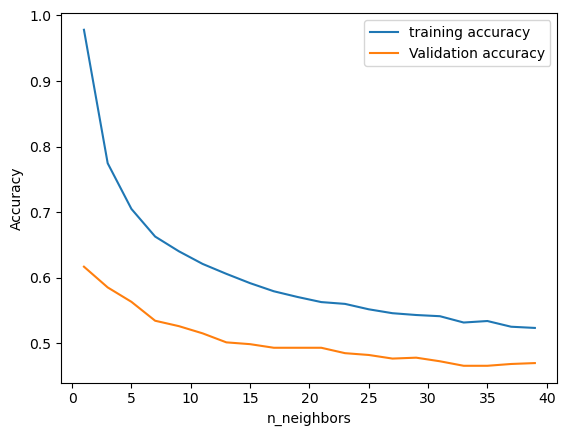

In [15]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20 only odd numbers
neighbors_settings = range(1, 40,2)

X_train, X_test, y_train, y_test = train_test_split(imagesAsPixelArrays, df['Color'], random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=69)


for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_val, y_val))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
#Add score for this 
print("Training Prediction: {}".format(knn.score(X_train,y_train)))

print("Test Prediction: {}".format(knn.score(X_test,y_test)))


Training Prediction: 0.5627864344637947
Test Prediction: 0.537590113285273


## 2. Flights Departing from NYC

__You should be able to do this exercise after Lecture 4.__

For this exercise we will be using the famous nycflights13 data which contains the `airlines`, `airports`, `flights`, `planes`, and `weather` datasets. Please see the documentation (`nycflights13.pdf`) for further information.

**(a)** Load all files as pandas dataframes and display the first 5 rows of each dataset.

In [5]:
#a
FOLDER  = "NYC_Flights/"

airlines_df = pd.read_csv(FOLDER + "airlines.csv")
airports_df = pd.read_csv(FOLDER + "airports.csv")
flights_df = pd.read_csv(FOLDER + "flights.csv")
planes_df = pd.read_csv(FOLDER + "planes.csv")
weather_df = pd.read_csv(FOLDER + "weather.csv")

In [6]:
airlines_df[0:5]

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [7]:
airports_df[0:5]

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5.0,A,America/New_York


In [8]:
flights_df[0:5]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [9]:
planes_df[0:5]

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [10]:
weather_df[0:5]

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


**(b)** Convert all temperature attributes to degree Celsius. We will be using this in what follows.

In [11]:
weather_df['temp'] = weather_df.apply(lambda x: (x['temp']-32)* 5/9 ,axis=1)
weather_df['dewp'] = weather_df.apply(lambda x: (x['dewp']-32)* 5/9 ,axis=1)

**(c)** Using OLS, investigate if flight distance is associated with arrival delay. You should be cautious regarding negative delays.

[]

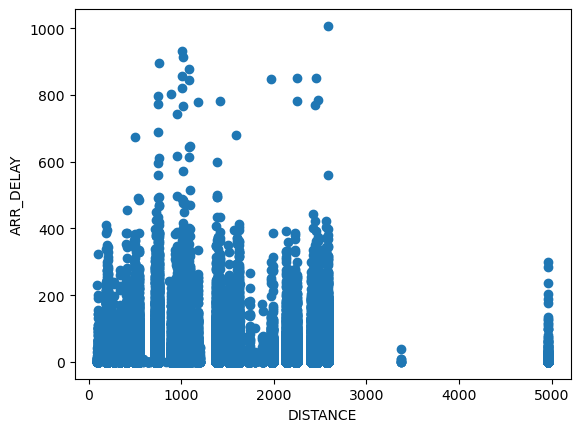

In [52]:
data = flights_df.loc[:,["arr_delay","distance"]].dropna()
# data = data.fillna(0)
X = data["distance"]
y = data["arr_delay"]
y[y<0] = 0
# y = y.fillna(0)
plt.scatter(X,y)
plt.xlabel("DISTANCE")
plt.ylabel("ARR_DELAY")
plt.plot()

In [53]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [54]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [55]:

ODS = LinearRegression()

ODS.fit(X_train, y_train)

LinearRegression()

R^2 on train data is 4.148259988234759e-05 and on test data is 9.545092960616675e-05


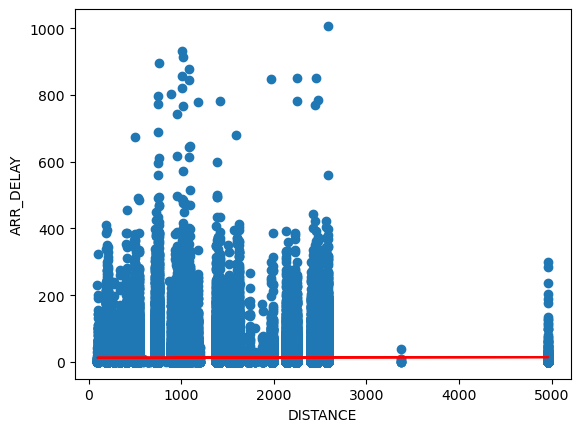

In [56]:
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))
plt.scatter(X,y)
y_predict = ODS.predict(X_test)
plt.xlabel("DISTANCE")
plt.ylabel("ARR_DELAY")
plt.plot(X_test,y_predict,color='red')
plt.show()
# #SINCE R2 is quite low, we can say that departure distance does not predict arrival delay
# When replacing negative values, a lower prediction is made

**(d)** Using OLS, investigate if departure delay is associated with arrival delay. Again,
   consider what to do with negative delays.

[]

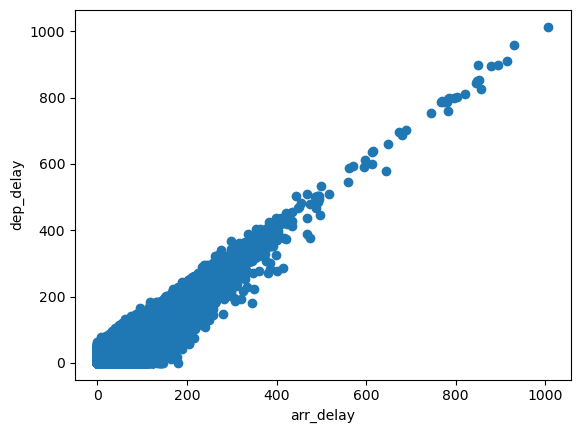

In [57]:
data = flights_df.loc[:,["dep_delay","arr_delay"]].dropna()

#NA is most frequent and thus mode is not a solution

X = data["arr_delay"]
y = data["dep_delay"]
X[X<0] = 0
y[y<0] = 0

plt.scatter(X,y)
plt.xlabel("arr_delay")
plt.ylabel("dep_delay")
plt.plot()

In [58]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


R^2 on train data is 0.8668469275898878 and on test data is 0.8694998794928759


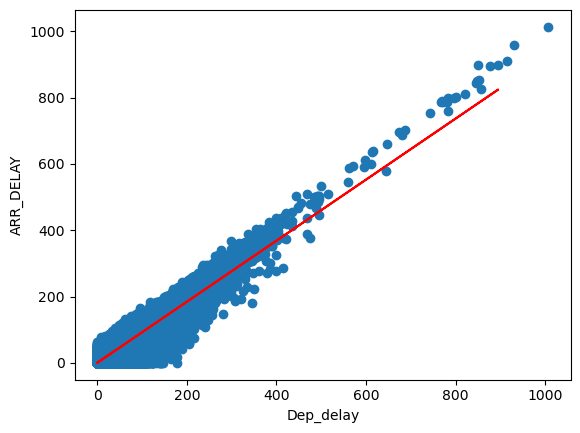

In [59]:
ODS = LinearRegression()

ODS.fit(X_train, y_train)
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))

plt.scatter(X,y)
y_predict = ODS.predict(X_test)
plt.xlabel("Dep_delay")
plt.ylabel("ARR_DELAY")
plt.plot(X_test,y_predict,color='red')
plt.show()

#Difference between replacing with mean and drop are not that big, 1 percent.

**(e)** Investigate whether departure delay is associated with weather conditions
   at the origin airport. This includes descriptives, plotting, regression modelling,
   considering missing values etc. For regression, do OLS, Ridge, Lasso, and Elastic Net.
   The analysis should also include seasonality trends as a "weather condition". You could,
   for instance, plot the daily departure delay with the date (or monthly). What are the
   three most important weather conditions when trying to predict departure delays?

**(f)** Is the age of the plane associated with delay? Do OLS, Ridge, Lasso, and Elastic Net.

In [60]:
data = flights_df.merge(planes_df, on='tailnum', how='left')
data = data.loc[:,["year_y","dep_delay","arr_delay"]]
y = data.loc[:,["year_y"]].values
X = data.loc[:,["arr_delay","dep_delay"]].values
X[X[:,0]<0] = 0
X[X[:,0]<0] = 0
y_mode = data.loc[:,['year_y']].mode()['year_y'][0]
np.nan_to_num(y,copy=False,nan=y_mode)

X_mode_arr = data.loc[:,['arr_delay']].mean()
np.nan_to_num(X[:,0],copy=False,nan=X_mode_arr)
X_mode_dep = data.loc[:,['dep_delay']].mean()
np.nan_to_num(X[:,1],copy=False,nan=X_mode_dep)

array([ 2.,  4.,  2., ...,  0.,  0., 80.])

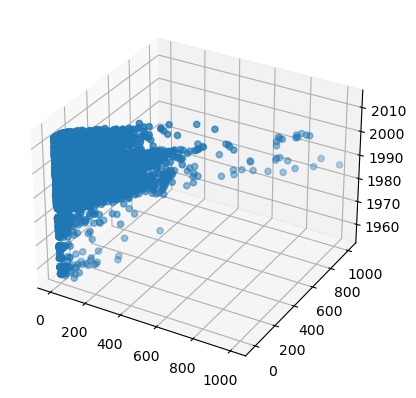

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1],y);

In [62]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
ODS = LinearRegression()
ODS.fit(X_train, y_train)
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))

#By doing OLS we can conclude that Plane Year manufacture is not associated with departure delay

R^2 on train data is 0.0008752974925068102 and on test data is 0.000717181382787424


#### Ridge Regression

In [63]:

alphas = 10**np.linspace(-10, 10, 100)
ridge = Ridge(normalize = True)
coefs = []
y = y.flatten()
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
arrDelay_coefficients = [coef[0] for coef in coefs]
depDelay_coefficients = [coef[1] for coef in coefs]

Text(0, 0.5, 'weights')

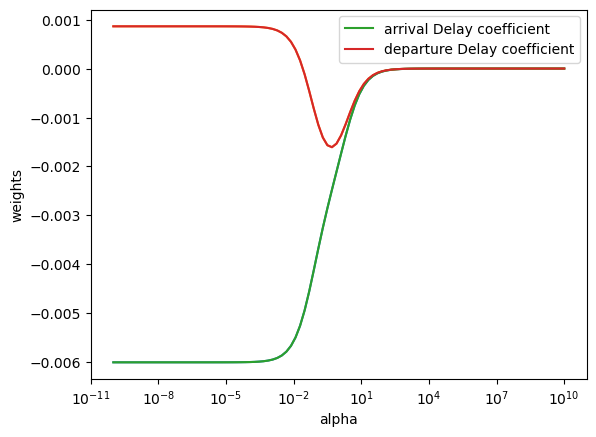

In [64]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.plot(alphas, arrDelay_coefficients, label="arrival Delay coefficient")
ax.plot(alphas, depDelay_coefficients, label="departure Delay coefficient")
ax.set_xscale('log')
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [65]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
for alpha in alphas:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))

alhpa = 1e-10
R^2 on train data is 0.0006758813133508346 and on test data is 0.000999752720716951
alhpa = 1.592282793341094e-10
R^2 on train data is 0.0006758813133508346 and on test data is 0.0009997527206978551
alhpa = 2.5353644939701164e-10
R^2 on train data is 0.0006758813133508346 and on test data is 0.000999752720667768
alhpa = 4.03701725859655e-10
R^2 on train data is 0.0006758813133509456 and on test data is 0.0009997527206195844
alhpa = 6.428073117284319e-10
R^2 on train data is 0.0006758813133509456 and on test data is 0.000999752720542868
alhpa = 1.0235310218990269e-09
R^2 on train data is 0.0006758813133509456 and on test data is 0.0009997527204208545
alhpa = 1.6297508346206469e-09
R^2 on train data is 0.0006758813133506125 and on test data is 0.0009997527202262324
alhpa = 2.595024211399732e-09
R^2 on train data is 0.0006758813133510566 and on test data is 0.0009997527199168132
alhpa = 4.132012400115335e-09
R^2 on train data is 0.0006758813133508346 and on test data is 0.00

In [66]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.030538555088334123

In [67]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(X_train, y_train), 
ridgecv.score(X_test,y_test)))     

R^2 on train data is 0.0006715961264223136 and on test data is 0.0009871397222318556


In [68]:
ridgecv.coef_

array([-4.52202087e-03,  1.64855952e-05])

#### Lasso

In [69]:
# #Lasso
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
arrDelay_coefficients = [coef[0] for coef in coefs]
depDelay_coefficients = [coef[1] for coef in coefs]
print(np.shape(coefs))

(100, 2)


Text(0, 0.5, 'weights')

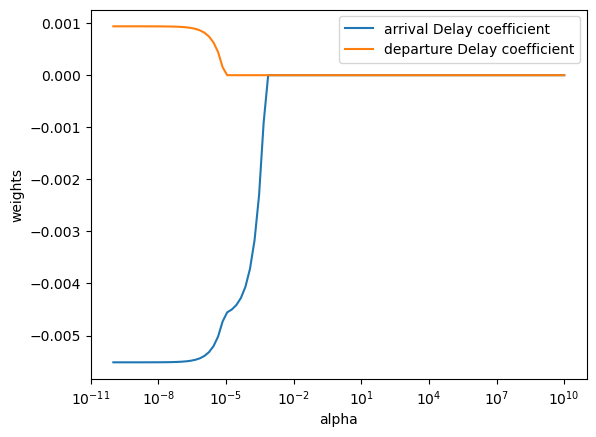

In [70]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, arrDelay_coefficients, label="arrival Delay coefficient")
ax.plot(alphas, depDelay_coefficients, label="departure Delay coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [71]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=1.7886495290574353e-05, max_iter=10000, normalize=True)

In [72]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.000671414275206117 and on test data is 0.0009865935049658825


In [73]:
pd.Series(lasso.coef_, index=["arr_delay","dep_delay"])

arr_delay   -0.004501
dep_delay   -0.000000
dtype: float64

#### Elastic Net

In [74]:
#Elastic Net
elasticNet = ElasticNet(alpha=1.7886495290574353e-05)
elasticNet.fit(X_train, y_train)


ElasticNet(alpha=1.7886495290574353e-05)

In [75]:
print("R^2 on train data is {} and on test data is {}".format(elasticNet.score(X_train, y_train), 
                                                              elasticNet.score(X_test,y_test)))

R^2 on train data is 0.0006758813133056485 and on test data is 0.0009997523584770462


**(g)** Do a principal component analysis of the weather at JFK using the following columns:
   temp, dewp, humid, wind_dir, wind_speed, precip, visib.
   How many principal components should be used to capture the variability in the weather data?

In [76]:
filter = weather_df['origin'] == 'JFK'
weather_df.sort_values("origin", inplace = True)
data = weather_df.where(filter).dropna()
X = data.loc[:,['temp','dewp','humid','wind_dir','wind_speed','precip','visib']].values

In [77]:
X_s = preprocessing.StandardScaler().fit_transform(X)
pca4 = decomposition.PCA(n_components=None)
res4 = pca4.fit_transform(X_s)
pca4.explained_variance_ratio_

array([3.78800411e-01, 2.04980335e-01, 1.62167222e-01, 1.05424117e-01,
       8.56196982e-02, 6.26518431e-02, 3.56374562e-04])

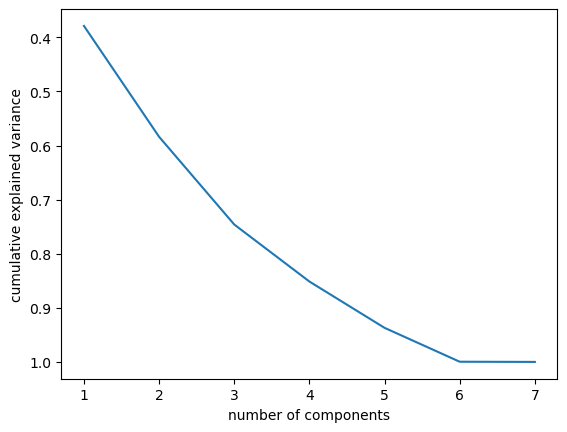

In [78]:
x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gca().invert_yaxis()
plt.show()

**(h)** Build regression models (OLS, Ridge, Lasso, and Elastic Net) that associates
   an airports lattitude with weather conditions (temp, dewp, humid, wind_dir, wind_speed,
   precip, visib). Remove all but the three most significant whether conditions and redo
   the analysis.

In [79]:
data = weather_df.merge(airports_df, left_on='origin',right_on='faa', how='left',)
data = data.fillna(data.median())
y = data.loc[:,['lat']].values
X = data.loc[:,['temp','dewp','humid','wind_dir','wind_speed','precip','visib']].values

In [80]:
#OLS
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
ODS = LinearRegression()
ODS.fit(X_train, y_train)
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))

R^2 on train data is 0.030389812804820227 and on test data is 0.04148183033431119


In [81]:
#RIDGE 
alphas = 10**np.linspace(-10, 10, 100)
ridge = Ridge(normalize = True)
coefs = []
y = y.flatten()
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
temp_coefficients = [coef[0] for coef in coefs]
dewp_coefficients = [coef[1] for coef in coefs]
humid_coefficients = [coef[2] for coef in coefs]
wind_dir_coefficients = [coef[3] for coef in coefs]
wind_speed_coefficients = [coef[4] for coef in coefs]
precip_coefficients = [coef[5] for coef in coefs]
visib_coefficients = [coef[6] for coef in coefs]

print(np.shape(coefs))

(100, 7)


Text(0, 0.5, 'weights')

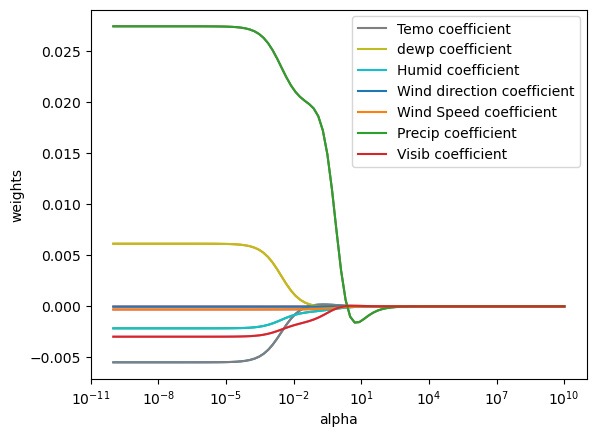

In [82]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.plot(alphas, temp_coefficients, label="Temo coefficient")
ax.plot(alphas, dewp_coefficients, label="dewp coefficient")
ax.plot(alphas, humid_coefficients, label="Humid coefficient")
ax.plot(alphas, wind_dir_coefficients, label="Wind direction coefficient")
ax.plot(alphas, wind_speed_coefficients, label="Wind Speed coefficient")
ax.plot(alphas, precip_coefficients, label="Precip coefficient")
ax.plot(alphas, visib_coefficients, label="Visib coefficient")

ax.set_xscale('log')
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [83]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
for alpha in alphas:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))

alhpa = 1e-10
R^2 on train data is 0.03467407485462537 and on test data is 0.015420227969891398
alhpa = 1.592282793341094e-10
R^2 on train data is 0.03467407485462559 and on test data is 0.015420227937148479
alhpa = 2.5353644939701164e-10
R^2 on train data is 0.03467407485462415 and on test data is 0.015420227885009852
alhpa = 4.03701725859655e-10
R^2 on train data is 0.03467407485462526 and on test data is 0.015420227801992259
alhpa = 6.428073117284319e-10
R^2 on train data is 0.034674074854623815 and on test data is 0.015420227669803221
alhpa = 1.0235310218990269e-09
R^2 on train data is 0.03467407485462404 and on test data is 0.015420227459322033
alhpa = 1.6297508346206469e-09
R^2 on train data is 0.03467407485462182 and on test data is 0.015420227124176122
alhpa = 2.595024211399732e-09
R^2 on train data is 0.03467407485461993 and on test data is 0.015420226590527886
alhpa = 4.132012400115335e-09
R^2 on train data is 0.03467407485461038 and on test data is 0.015420225740806592
alhpa

In [84]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
#Best alpha
ridgecv.alpha_

4.534878508128582e-05

In [85]:
ridgecv.coef_

array([-5.03274060e-03,  5.58478891e-03, -2.04135303e-03, -1.17553711e-05,
       -9.08061569e-04,  5.21508958e-02, -3.08871978e-03])

In [86]:
#LASSO
lasso = Lasso(max_iter = 10000, normalize = True,)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
temp_coefficients = [coef[0] for coef in coefs]
dewp_coefficients = [coef[1] for coef in coefs]
humid_coefficients = [coef[2] for coef in coefs]
wind_dir_coefficients = [coef[3] for coef in coefs]
wind_speed_coefficients = [coef[4] for coef in coefs]
precip_coefficients = [coef[5] for coef in coefs]
visib_coefficients = [coef[6] for coef in coefs]
print(np.shape(coefs))

(100, 7)


Text(0, 0.5, 'weights')

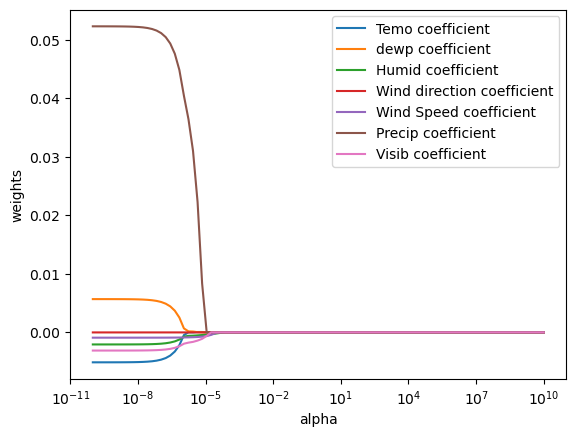

In [87]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, temp_coefficients, label="Temo coefficient")
ax.plot(alphas, dewp_coefficients, label="dewp coefficient")
ax.plot(alphas, humid_coefficients, label="Humid coefficient")
ax.plot(alphas, wind_dir_coefficients, label="Wind direction coefficient")
ax.plot(alphas, wind_speed_coefficients, label="Wind Speed coefficient")
ax.plot(alphas, precip_coefficients, label="Precip coefficient")
ax.plot(alphas, visib_coefficients, label="Visib coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [88]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True,)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=6.579332246575682e-09, max_iter=10000, normalize=True)

In [89]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.03467389311712665 and on test data is 0.015418535492685015


In [90]:
pd.Series(lasso.coef_, index=['temp','dewp','humid','wind_dir','wind_speed','precip','visib'])
#Three most important features are  precip,dewp and temp

temp         -0.005091
dewp          0.005647
humid        -0.002058
wind_dir     -0.000012
wind_speed   -0.000908
precip        0.052194
visib        -0.003102
dtype: float64

In [91]:
#REDO ANALYSIS
data = weather_df.merge(airports_df, left_on='origin',right_on='faa', how='left',)
data = data.fillna(data.median())
y = data.loc[:,['lat']].values
X = data.loc[:,['temp','dewp','precip']].values
#OLS
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
ODS = LinearRegression()
ODS.fit(X_train, y_train)
print("R^2 on train data is {} and on test data is {}".format(ODS.score(X_train, y_train), 
                                                              ODS.score(X_test,y_test)))
#OLS IS HALF OF THE PREVIOUS DATA

R^2 on train data is 0.014189994946971485 and on test data is 0.01742370669301363


In [92]:
#RIDGE 
alphas = 10**np.linspace(-10, 10, 100)
ridge = Ridge(normalize = True)
coefs = []
y = y.flatten()
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
temp_coefficients = [coef[0] for coef in coefs]
dewp_coefficients = [coef[1] for coef in coefs]
precip_coefficients = [coef[2] for coef in coefs]

print(np.shape(coefs))

(100, 3)


In [93]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
for alpha in alphas[:10]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(X_train, y_train), 
                                                              ridge.score(X_test,y_test)))

alhpa = 1e-10
R^2 on train data is 0.014000030781927575 and on test data is 0.015548637656933484
alhpa = 1.592282793341094e-10
R^2 on train data is 0.01400003078192602 and on test data is 0.015548637655907416
alhpa = 2.5353644939701164e-10
R^2 on train data is 0.014000030781925688 and on test data is 0.015548637654270725
alhpa = 4.03701725859655e-10
R^2 on train data is 0.01400003078192602 and on test data is 0.015548637651665587
alhpa = 6.428073117284319e-10
R^2 on train data is 0.014000030781927686 and on test data is 0.015548637647514907
alhpa = 1.0235310218990269e-09
R^2 on train data is 0.014000030781926687 and on test data is 0.015548637640909635
alhpa = 1.6297508346206469e-09
R^2 on train data is 0.014000030781925021 and on test data is 0.01554863763038794
alhpa = 2.595024211399732e-09
R^2 on train data is 0.014000030781927353 and on test data is 0.015548637613639671
alhpa = 4.132012400115335e-09
R^2 on train data is 0.01400003078192602 and on test data is 0.015548637586968783
a

In [94]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(X_train, y_train)
#Best alpha
ridgecv.alpha_,ridgecv.coef_

(0.0011768119524349992, array([ 0.00145584, -0.00136964,  0.05244577]))

In [95]:
#LASSO
lasso = Lasso(max_iter = 10000, normalize = True,)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
temp_coefficients = [coef[0] for coef in coefs]
dewp_coefficients = [coef[1] for coef in coefs]
precip_coefficients = [coef[2] for coef in coefs]
print(np.shape(coefs))

(100, 3)


In [96]:
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, normalize = True,)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=2.71858824273294e-07, max_iter=10000, normalize=True)

In [97]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))

R^2 on train data is 0.013993398681209746 and on test data is 0.015516535057935155


In [98]:
pd.Series(lasso.coef_, index=['temp','dewp','precip'])

temp      0.001441
dewp     -0.001356
precip    0.050352
dtype: float64

**(i)** On a map, plot the airports that have flights to them where the points that represent
   airports are relative in size to the average departure delay. You can see an example in "airports.png".

 **(j)** These questions require no code.
 - Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter or reduce it?

- Why would you want to use:
        > Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
        > Lasso instead of Ridge Regression?
        > Elastic Net instead of Lasso?

## 3. Clustering of Handwritten Digits

__You should be able to do this exercise after Lecture 5.__

This exercise will depart from the famous MNIST dataset, and we are exploring several clustering techniques with it.. This is a ".mat" file, in order to load this file in an ipynb you have to use loadmat() function from scipy.io. (replace my path).

In [11]:
from scipy.io import loadmat
mnist = loadmat('mnist-original')
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
import numpy as np
print("Number of datapoints: {}\n".format(mnist_data.shape[0]))
print("Number of features: {}\n".format(mnist_data.shape[1]))
print("List of labels: {}\n".format(np.unique(mnist_label)))

FileNotFoundError: [Errno 2] No such file or directory: 'mnist-original.mat'

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
index = 4
print("Value of datapoint no. {}:\n{}\n".format(index,mnist_data[index]))
print("As image:\n")
plt.imshow(mnist_data[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

**(a)** Perform k-means clustering with k=10 on this dataset.

**(b)** Using visualization techniques analogous to what we have done in the Clustering notebook
   for the faces data, can you determine the 'nature' of the 10 constructed clusters?
   Do the clusters (roughly) coincide with the 10 different actual digits?

**(c)** Perform a supervised clustering evaluation using adjusted rand index.
   Are the results stable, when you perform several random restarts of k-means?

**(d)** Now perform hierarchical clustering on the data.
   (in order to improve visibility in the constructed dendrograms, you can also use a
   much reduced dataset as constructed using sklearn.utils.resample shown below).
   Does the visual analysis of the dendrogram indicate a natural number of clusters?

**(e)** Using different cluster distance metrics (ward,single,average, etc.),
   what do the clusterings look like that are produced at the level of k=10 clusters?
   See the Clustering notebook for the needed Python code, including the fcluster
   method to retrieve 'plain' clusterings from the hierarchical clustering.

In [ ]:
small_mnist_data,small_mnist_label = skl.utils.resample(mnist.data,mnist.target,n_samples=200,replace='false')

**(f)** Do a DBSCAN clustering of the small dataset. Tweak the different parameters.

**(g)** Try to compare the different clustering methods on the MNIST dataset in the same way
   the book does on the faces dataset on pp. 195-206.

## 4. The Local Elections

__You should be able to do this exercise after Lecture 6.__

In the local elections of 2021, around 100 candidates stood for election for the city council of Horsens. 83 of them represented a national party, had more than one candidate and provided answers to the <a href="https://www.dr.dk/nyheder/politik/kandidattest">DR Candidate Test</a>, a test designed to help voters find out who they should vote for. In this test, the candidates answered 18 questions, which we will use as features in the following. The politicians belong to 9 parties, which will be our classes.

The numpy files `X_Horsens.npy` and `Y_Horsens.npy` contains the data. `Y_Horsens.npy` contains a letter representing the party to which each candidate belongs. The following parties are represented:

| Party letter | Party name | Party name (English) | Political position | Party color |
| :-: | :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left | Red |
| B | Radikale Venstre | Social Liberal Party | Centre-left | Indigo |
| C | Det Konservative Folkeparti | Conservative People's Party | Right-wing | Green |
| D | Nye Borgerlige | New Right | Far-right | Black |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing | Fuchsia |
| I | Liberal Alliance | Liberal Alliance | Right-wing | Cyan |
| O | Dansk Folkeparti | Danish People's Party | Far-right | Yellow |
| V | Venstre | Danish Liberal Party | Centre-right | Blue |
| Z* | Enhedslisten | Red-Green Alliance | Far-left | Dark red |

*_Note that, although the party letter of Enhedslisten is actually Ø, we will here use Z to avoid any complications with the wonderful Danish letters Æ, Ø and Å. Feel free to change the Z back to an Ø if you find that it does not cause any problems._

Meanwhile, `X_Horsens.npy` contains the answers to the test as numbers between -1.5 and 1.5, such that -1.5 is "Strongly disagree", -0.5 is "Disagree", 0.5 is "Agree" and 1.5 is "Strongly agree". The 18 questions concern, in order, subdivision, schools, windmills, building permits, tall buildings, housing, child care, culture, nursing homes, taxes, sports, refugees, nursing homes (again), public transportation, meat-free days, welfare, privatization, and religious minorities.

Both files can be imported using `numpy.load`.

__(a)__ How well do you (intuitively) expect that we can predict the partisan affiliation of a candidate based on their answers to the test?

__(b)__ Based on the answers from all 83 candidates for the Horsens city council, perform a Principal Component Analysis with 2 principal components. Plot the results in a figure using these 2 components as the axes. Label the points with the party letter and the appropriate color.

__(c)__ Comment on the results. You may consider the following questions for inspiration: Can the political parties be separated? Can the typical distinction of "left-wing" and "right-wing" be discerned? Which of the 18 questions (features) are most important?

The number of candidates (83) is on the (very) low side when we want to do machine learning. Luckily, the neighbouring city of Databorg had no less than 8,300 candidates standing for election, with a political environment similar to that of Horsens. In the following, we will use the data from Databorg. These are stored in the numpy files `X_Databorg.npy` and `Y_Databorg.npy` in same format as the Horsens data.

__(d)__ Once again, perform a Principal Component Analysis and visualize the results. Compare the results to those of the Horsens data.

Confident that we can predict the partisan affiliation of a politician reasonably well based on their answers to the test, we want to build a model that will allow us to distinguish between the 9 political parties. For this purpose, we split the data into a training and a validation set.

__(e)__ Split the data into a training and a validation set, with appropriate fractions.

First, we assume that a Naive Bayes approach is sufficient for our purposes.

__(f)__ Comment on the basic assumption of the Naive Bayes approach. Is this a reasonable assumption for the problem at hand?

__(g)__ Classify the instances of the validation set using a Naive Bayes approach. Comment on the results.

Assume instead that a _k_-nearest neighbour approach is sufficient for our  needs.

__(h)__ Using default settings of the _k_-NN classifier, classify the instances of the validation set. Comment on the performance.

__(i)__ Play around with different values of _k_. Decide on a "good" value of _k_. Comment on the results.

We now try to use a decision tree instead.

__(j)__ What is the _minimum_ depth of an appropriate decision tree? Why?

__(k)__ Build a decision tree with at least the depth from above. Play around with the tree depth. Include a figure that shows some relevant measure of the performance as a function of the tree depth. Comment on any issues of over-fitting. Decide on a tree which you will keep for later use. Can you do better than the _k_-NN classifier?

__(l)__ What are the most important features? Visualize this in an appropriate way. Does it match what you would expect? Compare to the results of the PCA analysis. Do we expect them to be the same? Why/why not?

We know that decision trees suffer from certain problems that may be solved by using decision forests.

__(m)__ Build a decision forest. Play around with the number of trees in the forest. Decide on a forest.

__(n)__ Extract the most important features. Comment and compare with previously obtained results.

Finally, we want to compare the models we have worked with so far (i.e., Naive Bayes, _k_-NN, decision tree and decision forest).

__(o)__ Compare the results of the in terms of confusion matrices, accuracy, precision, recall, and f-score. How well can we predict the partisan affiliation of a candidate based on their answers to a test? How does this compare with your intuition? 

## 5. Sentiment Analysis

__You should be able to do this exercise after Lecture 8.__

In this exercise we use the IMDb-dataset, which we will use to perform a sentiment analysis. The code below assumes that the data is placed in the same folder as this notebook. We see that the reviews are loaded as a pandas dataframe, and print the beginning of the first few reviews.

In [ ]:
reviews = pd.read_csv('Sentiment Analysis/reviews.txt', header=None)
labels = pd.read_csv('Sentiment Analysis/labels.txt', header=None)
Y = (labels=='positive').astype(np.int_)

print(reviews.head)
print(labels.head)
Y=to_categorical(Y, 2)

**(a)** Split the reviews and labels in test, train and validation sets. The train and validation sets will be used to train your model and tune hyperparameters, the test set will be saved for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviews, Y, test_size=0.2, random_state=69, stratify = Y)

**(b)** Use the `CountVectorizer` from `sklearn.feature_extraction.text` to create a Bag-of-Words representation of the reviews. (See an example of how to do this in chapter 7 of "Muller and Guido"). Only use the 10,000 most frequent words (use the `max_features`-parameter of `CountVectorizer`).

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

stopwords = stopwords.words("english")
stopwords.extend(['br', 'p'])

vect = CountVectorizer(max_features=10000, stop_words =stopwords).fit(X_train[0])
X_train = vect.transform(X_train[0]).toarray()
X_test = vect.transform(X_test[0]).toarray()

**(c)** Explore the representation of the reviews. How is a single word represented? How about a whole review?

##### Top 1000 words:

In [ ]:
print(vect.get_feature_names_out())

###### A word is represented as a number of appearances in a sentance, corresponding with its index from the bag of words

###### This is how a review is represented -> an array of 10000 elements (the entire bag of words)  - index corresponds to the bag of words and value repesents appearece in the sentance:

In [ ]:
print(X_train[0])

###### The first word that's found in the sentance is:

In [ ]:
i = np.where(X_train[0] > 1)
print(vect.get_feature_names_out()[i[0][0]])

**(d)** Train a neural network with a single hidden layer on the dataset, tuning the relevant hyperparameters to optimize accuracy. 

In [ ]:
seed(69)
tf.random.set_seed(69)
input_size = X_train[0].shape[0]
num_classes = 2 #positive or negative

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 10) #early stoppage when it tends to overfit
model = Sequential() #initialize a neural network
#add a hidden layer. L1 regularizer (Lasso - deletes the features if their importance is low)
model.add(Dense(units = 10, activation = 'tanh', input_dim = input_size, kernel_regularizer = regularizers.l1(0.003)))
model.add(Dense(units = num_classes, activation = 'softmax')) #add the output layer

model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])#sgd = optimizers.SGD(learning_rate = 0.1))
history = model.fit(X_train, y_train, epochs = 200, batch_size = 100, verbose = 1, validation_split = 0.2, callbacks = [callback])

In [ ]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Cross entropy loss")
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'valid')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

**(e)** Test your sentiment-classifier on the test set.

In [ ]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test)))

**(h)** Use the classifier to classify a few sentences you write yourselves. 

In [ ]:
# first 3 reviews are taken from IMDB to see if the score matches the sentiment

# ----- good reviews ------
review1 = 'It is now past 1 PM and I just finished watching Francis Ford Coppola\'s "The Godfather". I should probably go to bed. It\'s late and tomorrow I have to wake up a bit early. But not early enough to postpone writing these lines. Now that I have seen it three times, the opportunity of sharing my thoughts and refreshed insights are too much of a good offer to sit on. So, bear with me. This film works so well because it takes place in an underworld in which we are so embedded that we do not even observe it. Coppola puts us straight in the smack-dab center of what is, admittedly, a society made by criminals for criminals. It is also the reason why it\'s so welcoming. We are surrounded by its inhabitants--cold-blooded murderers, men who see crime like a 9 to 5 job masquerading as honorable men. And I do mean men. From the outside, we would only witness the horrifying, disturbing manifestations of their well-thought out actions. But it goes even deeper than that. It all revolves around the Corleone family led by Don Vito Corleone (Marlon Brando). He is the most honest of these men, sitting right on the edge. But for people like him, who do not fully embrace this world, it\'s not easy. He avoids conflict until it is absolutely necessary. He is a man defined by moral principles. There is a scene at the beginning, in which, during his daughter\'s wedding day, one of his associates, Luca Brasi (Lenny Montana) practices his speech that he is going to give to the Don when he meets him. The scene with these two is funny and almost adorable. I could not help but sympathize both of them only to realize that I am feeling warmth for two mobsters. Not to even mention that Lenny Montana was an actual mob hit-man and that he was actually nervous as he said that line. The more I watched the more I realized just how incredibly complex and ruthless this society is and how it has the power to corrupt anyone to come in contact with it. The best example is Corleone\'s youngest son, Michael (Al Pacino). He returns home for his sister\'s wedding as a war hero dressed the part with his long-time girlfriend, Kay Adams (Diane Keaton). At first, he avoids this underworld, but necessity, first-hand exposure and just its sheer devilish appealing nature draws him in. As we get further in the film, the change is shocking and every outsider who ever got close to him is tainted in one way or another. If they survive it, they are drawn in as well as we are as viewers. Inside, Coppola exposes the family to us fully, with a bold personal approach and we witness every discussion, every methodically calculated choice. Crime is done simply because it is the nature of their business, and we are put on a chair alongside them, so we easily relate. For us, they are the good guys, the rival families are the bad guys. This is the greatest feat this film managed to pull off--set apart good guys and bad guys in a world filled with bad guys. This is a film of unmatched subtlety. No other movie sustains itself as good. No other film is done with such precision, attention and completeness. There are many layers which I probably missed and maybe will never notice. But I felt them. What director Francis Ford Coppola and his partner in crime (poor choice of words, sorry) Mario Puzo did is nothing short of a timeless piece of reference cinema whose influence is not based on reinventing the wheel, but rather perfecting it to the absolute maximum. Most masterpieces are remembered for their historical contributions. "Citizen Kane" brought the biggest step-up to the art form, the same things did "Gone With the Wind" or "2001: A Space Odyssey". "The Godfather" is one of the few films that will be remembered simply because they are that good and I cannot possibly imagine a greater achievement.'
review2 = 'Nice story, didn\'t feel like a movie'
review3 = 'This film was probably a fascinating piece of sci-fi writing, but as a movie it was a pretty weak effort. From the cinematography to the acting - this was a non-budget sci-fi channel original movie. Sub-career actors giving hammy performances - often skating the line of annoying. I have to admit that the basic story here is very interesting and thought provoking. I cant say it was perfectly written, but this is science fiction. I think this would work good as a play. Id also like to see this re-done with a better cast and director. In the end though - there was nothing here that gave me chills or touched me in some special way or gave me any sort of epiphany like it seems to have done for so many others... At best it held my attention until the end. Its very much average and mediocre - it will end up being the sort of thing people will reference in speculative conversations with their friends to help them feel smarter. It will end up being shown to high school and college students by that hip and cool teacher. Its very accessible and gently challenges religion, so its perfect for that. Ive definitely seen better science fiction movies - with or without action or special effects.'
review4 = 'Such a fantastic movie'

# ----- bad reviews ------
review5 = 'This was a freaking disaster, nothing good came out of it'
review6 = 'I didn\'t like this movie, the could have done a better job'
review7 = 'Can we even call this a movie?'
review8 = 'How did anyone last enough in the cinema?'

# ----- mixed feelings ------
review9 = 'This gave me mixed feelings'

test_data = []
test_data.extend([review1.lower(), review2.lower(), review3.lower(),
                  review4.lower(), review5.lower(), review6.lower(), 
                  review7.lower(), review8.lower(), review9.lower()])
new_X_test = vect.transform(test_data)
probabilities = np.array(model.predict(new_X_test))
predictions = np.argmax(probabilities, axis = 1) #what does the model predict

print(predictions)

##### All of our categorical reviews were categorised with the right label, the mixed feelings one returned a positive label which is quite an interesting thing

In [ ]:
probabilities[8]

##### The probability of the "mixed feelings" review returns an almost identical prediction, although it tends to be more positive

## 6. Speech Recognition

__You should be able to do this exercise after Lecture 9.__

In this exercise, we will work with the <a href="https://arxiv.org/pdf/1804.03209.pdf">Google Speech Command Dataset</a>, which can be downloaded from <a href="http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz">here</a> (note: you do not need to download the full dataset, but it will allow you to play around with the raw audiofiles). This dataset contains 105,829 one-second long audio files with utterances of 35 common words.

We will use a subset of this dataset as indicated in the table below.

| Word | How many? | Class # |
| :-: | :-: | :-: |
| Yes | 4,044 | 3 |
| No | 3,941 | 1 |
| Stop | 3,872 | 2 |
| Go | 3,880 | 0 |

The data is given in the files `XSound.npy` and `YSound.npy`, both of which can be imported using `numpy.load`. `XSound.npy` contains spectrograms (_e.g._, matrices with a time-axis and a frequency-axis of size 62 (time) x 65 (frequency)). `YSound.npy` contains the class number, as indicated in the table above.

__(a)__ Explore and prepare the data, including splitting the data in training, validation and testing data, handling outliers, perhaps taking logarithms, etc. Data preparation is - as always - quite important. Document what you do.

__(b)__ Visualize a few examples of yes's, no's, stop's and go's, so that you have a reasonable intuitive understanding of the difference between the words.

__(c)__ Train a neural network and at least one other algorithm on the data. Find a good set of hyperparameters for each model. Do you think a neural network is suitable for this kind of problem? Why/why not?

__(d)__ Classify instances of the validation set using your models. Comment on the results in terms of metrics you have learned in the course.

__(e)__ Identify (a few) misclassified words, including what they are misclassified as. Visualize them as before, and compare with your intuitive understanding of how the words look. Do you find the misclassified examples surprising?

## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above (the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).

### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?

### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)

### 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned

### 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set
    
    
1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features

### 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors

### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

## References

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.